# Supervised Learning Project <a id='intro'></a>

## Project Description

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.

Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.

Additionally, measure the AUC-ROC metric and compare it with the F1.  

## Project Instructions

1) Download and prepare the data. Explain the procedure.
2) Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
3) Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
4) Perform the final testing.

## Data Description

The data can be found in `/datasets/Churn.csv` file.  

### Features

- **RowNumber** — data string index
- **CustomerId** — unique customer identifier
- **Surname** - surname
- **CreditScore** — credit score
- **Geography** — country of residence
- **Gender** — gender
- **Age** — age
- **Tenure** — period of maturation for a customer’s fixed deposit (years)
- **Balance** — account balance
- **NumOfProducts** — number of banking products used by the customer
- **HasCrCard** — customer has a credit card
- **IsActiveMember** — customer’s activeness
- **EstimatedSalary** — estimated salary

### Target

- **Exited** — сustomer has left


## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle

## Load Data

In [2]:
# Load 'Churn.csv' into a data frame
try:
    # Try to read the CSV file from the local path.
    churn_df = pd.read_csv('/Users/benjaminstephen/Documents/TripleTen/Sprint_8/Supervised_Learning_Project/datasets/Churn.csv')
except FileNotFoundError:
    try:
        # Try to read the CSV file from the server path
        churn_df = pd.read_csv('/datasets/Churn.csv')
        print("CSV file successfully read from the server path.")
    except FileNotFoundError:
        print("CSV file not found. Please check the file paths.")
else:
    print("CSV file successfully read from the local path.")

CSV file successfully read from the local path.


## Analyze & Prepare Data


In [3]:
# Print the general/summary information about 'users_behavior_df'
print("CHURN DATA FRAME FRAME INFO:")
churn_df.info()
print()

print("PERCENTAGE OF NULL VALUES:")
print(churn_df.isnull().sum()/len(churn_df))
print()

print("CHURN DATA FRAME:")
display(churn_df)
print()

CHURN DATA FRAME FRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB

PERCENTAGE OF NULL VALUES:
RowNumber          0.0000
CustomerId 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


The dataset contains 10,000 entries across 14 columns, consisting of integer, float, and object data types. All columns are appropriately defined, ensuring data integrity and suitability for analysis. The 'Tenure' column is the only one with missing values, totaling 909 missing entries, which will be imputed using the median value of the column.

In [4]:
# Calculate the median of the 'Tenure' column
median_tenure = churn_df['Tenure'].median()

# Fill missing values in the 'Tenure' column with the calculated median
churn_df['Tenure'].fillna(median_tenure, inplace=True)

# Verify that there are no more missing values in 'Tenure'
print("Number of missing 'Tenure' values:", churn_df['Tenure'].isnull().sum())

Number of missing 'Tenure' values: 0


Regarding the target variable 'Exited', it comprises integer values (int64) with precisely two unique values: 0 and 1. These values signify customers who have not exited (0) and those who have exited (1), establishing a clear binary classification task for predictive modeling.

With a comprehensive understanding of the dataset's structure and the nature of the target variable, we are well-positioned to proceed with preprocessing steps such as imputation and feature engineering, followed by model building and evaluation. This structured approach ensures that the predictive models developed will effectively address the business problem of identifying potential churners and aid in implementing proactive retention strategies.

## Define Functions

In [5]:
# Split Data Function
def split_data(df):
    # Extract features by dropping irrelevant columns 'Exited', 'Surname', 'RowNumber', and 'CustomerId'
    features = df.drop(['Exited', 'Surname', 'RowNumber', 'CustomerId'], axis=1)

    # Extract the target variable 'Exited'
    target = df['Exited']

    # Split data: 60% for training, 20% for validation, and 20% for testing
    features_train, features_temp, target_train, target_temp = train_test_split(
        features, 
        target, 
        test_size=0.4, 
        random_state=12345)

    # Further split the remaining 40% into validation (20%) and test (20%) sets
    features_valid, features_test, target_valid, target_test = train_test_split(
        features_temp, 
        target_temp, 
        test_size=0.5, 
        random_state=12345)
    
    return features_train, target_train, features_valid, target_valid, features_test, target_test

# Set Size Function
def set_size(features_train, target_train, features_valid, target_valid, features_test, target_test):
    # Print sizes of training, validation, and test sets
    print('Training Feature Set Size:', features_train.shape)
    print('Training Target Set Size:', target_train.shape)
    print()
    print('Validation Feature Set Size:', features_valid.shape)
    print('Validation Target Set Size:', target_valid.shape)
    print()
    print('Test Feature Set Size:', features_test.shape)
    print('Test Target Set Size:', target_test.shape)
    

# Metrics Function
def metric(target, prediction):
    # Calculate and return accuracy, recall, precision, and F1 scores
    accuracy = accuracy_score(target, prediction)
    recall = recall_score(target, prediction)
    precision = precision_score(target, prediction)
    f1 = f1_score(target, prediction)

    return accuracy, recall, precision, f1 

# Print Metrics Function
def print_metrics(accuracy, recall, precision, f1):
    # Print accuracy, recall, precision, and F1 scores
    print("Accuracy Score:", accuracy)
    print("Recall Score:", recall)
    print("Precision Score:", precision)
    print("F1 Score:", f1)

# Downsample Function
def downsample(features, target, fraction):
    # Separate features and target for both classes (0 and 1)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Downsample the majority class (class 0) to match the minority class (class 1)
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    # Shuffle the downsampled data to mix the classes
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled

# Upsample Function
def upsample(features, target, repeat):
    # Separate features and target for both classes (0 and 1)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # Upsample the minority class (class 1) by repeating instances
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # Shuffle the upsampled data to mix the classes
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

# Decision Tree Validation Function
def decision_tree_validation(features_train, target_train, features_valid, target_valid):
    best_accuracy = 0
    best_recall = 0
    best_precision = 0
    best_f1 = 0
    best_depth = 0
    
    # Iterate over different depths for Decision Tree model
    for depth in range(1, 21):
        # Create Decision Tree model with specified max_depth
        model = DecisionTreeClassifier(random_state=12345, class_weight='balanced', max_depth=depth)
    
        # Train the model on training set
        model.fit(features_train, target_train)

        # Predict on validation set and calculate metrics
        predicted_valid = model.predict(features_valid)
        accuracy, recall, precision, f1 = metric(target_valid, predicted_valid)
        
        # Update best metrics if current F1 score is better
        if f1 > best_f1:
            best_accuracy = accuracy
            best_recall = recall
            best_precision = precision
            best_f1 = f1
            best_depth = depth

    return best_accuracy, best_recall, best_precision, best_f1, best_depth, model

# Random Forest Validation Function
def random_forest_validation(features_train, target_train, features_valid, target_valid):
    best_accuracy = 0
    best_recall = 0
    best_precision = 0
    best_f1 = 0
    best_depth = 0
    best_est = 0
    
    # Iterate over different depths and number of estimators for Random Forest model
    for depth in range(1, 6):
        for est in range(1, 51):
            # Create Random Forest model with specified max_depth and n_estimators
            model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=depth, n_estimators=est)
    
            # Train the model on training set
            model.fit(features_train, target_train)

            # Predict on validation set and calculate metrics
            predicted_valid = model.predict(features_valid)
            accuracy, recall, precision, f1 = metric(target_valid, predicted_valid)
        
            # Update best metrics if current F1 score is better
            if f1 > best_f1:
                best_accuracy = accuracy
                best_recall = recall
                best_precision = precision
                best_f1 = f1
                best_depth = depth
                best_est = est

    return best_accuracy, best_recall, best_precision, best_f1, best_depth, best_est, model

# AUC-ROC Function
def auc_roc(model, features, target):
    # Predict probabilities for target class 1
    probabilities_test = model.predict_proba(features)
    probabilities_one_valid = probabilities_test[:, 1]

    # Calculate AUC-ROC score
    auc_roc = roc_auc_score(target, probabilities_one_valid)
    print("AUC-ROC:", auc_roc)

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(target, probabilities_one_valid)

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], linestyle='--')  # ROC curve for random model
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

## Feature Preparation

In our investigation, we will utilize three models: Logistic Regression, Decision Tree, and Random Forest. To ensure optimal performance, we need to prepare the features appropriately for each model, recognizing that Logistic Regression requires a different approach than the tree-based models.

### One-Hot Encoding (For Logistic Regression Model)

Logistic Regression relies on a mathematical formula comprising numerical features to determine the category. Therefore, it is essential to one-hot encode the categorical features 'Geography' and 'Gender', as these are the only non-numerical variables in our dataset.

Moreover, Logistic Regression, like many linear models, is sensitive to the scale of input features. Features with different scales can bias the model towards those with larger ranges, impacting the coefficients and overall performance. Consequently, we will scale all the features used in the Logistic Regression model to ensure a consistent and unbiased evaluation. 

After feature preparation is accomplished, we will splait the data appropriately: 60% for training, 20% for validation, and 20% for testing.

In [6]:
# One-Hot Encode the dataset, making sure to avoid falling into the dummy variable trap
data_ohe = pd.get_dummies(churn_df, columns=['Geography', 'Gender'], drop_first=True)

# Split the data into training, validation, and testing sets
features_train_ohe, target_train_ohe, features_valid_ohe, target_valid_ohe, features_test_ohe, target_test_ohe = split_data(data_ohe)

# Display the size of each split to ensure they are correct (60% training, 20% validation, 20% testing)
set_size(features_train_ohe, target_train_ohe, features_valid_ohe, target_valid_ohe, features_test_ohe, target_test_ohe)

# Define the numeric features that need to be scaled
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Suppress SettingWithCopyWarning for chained assignments
pd.options.mode.chained_assignment = None

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(features_train_ohe[numeric])

# Scale the numeric features in the training, validation, and testing sets
features_train_ohe[numeric] = scaler.transform(features_train_ohe[numeric])
features_valid_ohe[numeric] = scaler.transform(features_valid_ohe[numeric])
features_test_ohe[numeric] = scaler.transform(features_test_ohe[numeric])

# Display the training features to check the encoding and scaling
display(features_train_ohe)

Training Feature Set Size: (6000, 11)
Training Target Set Size: (6000,)

Validation Feature Set Size: (2000, 11)
Validation Target Set Size: (2000,)

Test Feature Set Size: (2000, 11)
Test Target Set Size: (2000,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,8.0,1.232271,1,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,8.0,0.600563,1,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,3.0,1.027098,2,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,6.0,-1.233163,2,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,2.0,1.140475,1,0,0,1.524268,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4478,-1.073677,-0.752805,4.0,-1.233163,2,0,1,-1.278361,0,0,1
4094,-1.447531,-0.942612,10.0,-1.233163,2,0,1,-1.281307,0,0,1
3492,0.027113,0.575842,5.0,-0.310229,1,0,1,-0.903158,0,0,0
2177,0.151731,-1.417129,4.0,-1.233163,2,0,1,-1.128539,0,0,0


### Label Encoding (For Tree Models) [Decision Tree & Random Forest]

Next, we will focus on feature preparation for the tree-based models: Decision Tree and Random Forest. These algorithms are well-suited for handling label-encoded categorical features because they split nodes based on feature values rather than their numerical representations. Decision Trees and Random Forests can effectively utilize label-encoded features since they employ inequalities to split nodes and do not assume a linear relationship between the feature values.

As with Logistic Regression, we will split the data into appropriate subsets after feature processing: 60% for training, 20% for validation, and 20% for testing.

In [7]:
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the encoder on the original dataframe 'churn_df'
data_ordinal = pd.DataFrame(encoder.fit_transform(churn_df), columns=churn_df.columns)

# Split the ordinal-encoded data into training, validation, and testing sets
features_train_ordinal, target_train_ordinal, features_valid_ordinal, target_valid_ordinal, features_test_ordinal, target_test_ordinal = split_data(data_ordinal)

# Display the size of each split to ensure they are correct (60% training, 20% validation, 20% testing)
set_size(features_train_ordinal, target_train_ordinal, features_valid_ordinal, target_valid_ordinal, features_test_ordinal, target_test_ordinal)

# Display the training features to check the encoding
display(features_train_ordinal)

Training Feature Set Size: (6000, 10)
Training Target Set Size: (6000,)

Validation Feature Set Size: (2000, 10)
Validation Target Set Size: (2000,)

Test Feature Set Size: (2000, 10)
Test Target Set Size: (2000,)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7479,176.0,2.0,1.0,17.0,8.0,5562.0,0.0,1.0,0.0,4416.0
3411,320.0,0.0,0.0,19.0,8.0,2688.0,0.0,0.0,0.0,3997.0
6027,459.0,1.0,1.0,26.0,3.0,4859.0,1.0,0.0,1.0,9319.0
1247,121.0,0.0,1.0,6.0,6.0,0.0,1.0,1.0,0.0,1853.0
3716,274.0,1.0,0.0,9.0,2.0,5276.0,0.0,0.0,0.0,9362.0
...,...,...,...,...,...,...,...,...,...,...
4478,158.0,0.0,1.0,13.0,4.0,0.0,1.0,0.0,1.0,1249.0
4094,122.0,0.0,1.0,11.0,10.0,0.0,1.0,0.0,1.0,1242.0
3492,264.0,0.0,0.0,27.0,5.0,123.0,0.0,0.0,1.0,2312.0
2177,276.0,0.0,0.0,6.0,4.0,0.0,1.0,0.0,1.0,1679.0


## Class Imbalance Analysis

Before proceeding with data balancing techniques, let's first analyze our target variable distribution to determine if adjustments are necessary to handle the imbalance between positive and negative observations.

In [8]:
print("Number of POSITIVE observations:", np.sum(target_train_ohe == 1))
print("Number of NEGATIVE observations:", np.sum(target_train_ohe == 0))

total_observations = np.sum(target_train_ohe == 1) + np.sum(target_train_ohe == 0)
print()

print("Pecentage of POSITIVE observations:", np.sum(target_train_ohe == 1)/total_observations)
print("Percentage of NEGATIVE observations:", np.sum(target_train_ohe == 0)/total_observations)

Number of POSITIVE observations: 1196
Number of NEGATIVE observations: 4804

Pecentage of POSITIVE observations: 0.19933333333333333
Percentage of NEGATIVE observations: 0.8006666666666666


Upon examining the dataset, we found that there are 1196 positive observations and 4804 negative observations. This distribution translates to approximately 19.93% positive observations and 80.07% negative observations of the total dataset. The substantial class imbalance observed—where negative observations dominate over positive ones—highlights a potential challenge for machine learning models, particularly those sensitive to skewed class distributions.

To establish a baseline for model performance improvement, we will initiate training using Logistic Regression and tree-based models on this imbalanced dataset. This initial step will help us gauge the current performance and subsequently explore methods to enhance model effectiveness, considering the skewed class proportions.

### Logistic Regression Model (Imbalanced)

In [9]:
# Initialize Logistic Regression model with specified parameters
lr_imbalanced_model = LogisticRegression(random_state=12345, solver='liblinear')

# Train the Logistic Regression model on the imbalanced training data
lr_imbalanced_model.fit(features_train_ohe, target_train_ohe)

# Predict on the validation set
lr_imbalanced_predicted_valid = lr_imbalanced_model.predict(features_valid_ohe)

# Calculate and print evaluation metrics
print("Logistic Regression Model Metrics w/ Imbalanced Dataset:")
print()
lr_imbalanced_accuracy, lr_imbalanced_recall, lr_imbalanced_precision, lr_imbalanced_f1 = metric(target_valid_ohe, lr_imbalanced_predicted_valid)
print_metrics(lr_imbalanced_accuracy, lr_imbalanced_recall, lr_imbalanced_precision, lr_imbalanced_f1)

Logistic Regression Model Metrics w/ Imbalanced Dataset:

Accuracy Score: 0.802
Recall Score: 0.23444976076555024
Precision Score: 0.5632183908045977
F1 Score: 0.33108108108108103


### Descision Tree Model (Imbalanced)

In [10]:
# Initialize Decision Tree model with specified parameters
dt_imbalanced_model = DecisionTreeClassifier(random_state=12345)

# Train the Decision Tree model on the imbalanced training data
dt_imbalanced_model.fit(features_train_ordinal, target_train_ordinal)

# Predict on the validation set
dt_imbalanced_predicted_valid = dt_imbalanced_model.predict(features_valid_ordinal)

# Calculate and print evaluation metrics
print("Decision Tree Model Metrics w/ Imbalanced Dataset:")
print()
dt_imbalanced_accuracy, dt_imbalanced_recall, dt_imbalanced_precision, dt_imbalanced_f1 = metric(target_valid_ordinal, dt_imbalanced_predicted_valid)
print_metrics(dt_imbalanced_accuracy, dt_imbalanced_recall, dt_imbalanced_precision, dt_imbalanced_f1)

Decision Tree Model Metrics w/ Imbalanced Dataset:

Accuracy Score: 0.778
Recall Score: 0.45215311004784686
Precision Score: 0.46782178217821785
F1 Score: 0.45985401459854014


### Random Forest Model (Imbalanced)

In [11]:
# Initialize Random Forest model with specified parameters
rf_imbalanced_model = RandomForestClassifier(random_state=12345)

# Train the Random Forest model on the imbalanced training data
rf_imbalanced_model.fit(features_train_ordinal, target_train_ordinal)

# Predict on the validation set
rf_imbalanced_predicted_valid = rf_imbalanced_model.predict(features_valid_ordinal)

# Calculate and print evaluation metrics
print("Random Forest Model Metrics w/ Imbalanced Dataset:")
print()
rf_imbalanced_accuracy, rf_imbalanced_recall, rf_imbalanced_precision, rf_imbalanced_f1 = metric(target_valid_ordinal, rf_imbalanced_predicted_valid)
print_metrics(rf_imbalanced_accuracy, rf_imbalanced_recall, rf_imbalanced_precision, rf_imbalanced_f1)

Random Forest Model Metrics w/ Imbalanced Dataset:

Accuracy Score: 0.8585
Recall Score: 0.45933014354066987
Precision Score: 0.7710843373493976
F1 Score: 0.575712143928036


In evaluating models with an imbalanced dataset for predicting customer churn, the Logistic Regression, Decision Tree, and Random Forest models each displayed distinct performance characteristics. The Logistic Regression model achieved the highest accuracy at 80.2%, but struggled with a low recall of 23.4% and consequently a low F1 score of 0.331, indicating challenges in effectively identifying customers who actually churned. The Decision Tree model, while showing improvement in recall at 45.2% compared to logistic regression, still exhibited modest precision and an F1 score of 0.460, suggesting a need for better balance in prediction accuracy. In contrast, the Random Forest model emerged as the top performer with an accuracy of 85.85%, highest among the models evaluated, along with a precision of 77.1% and the best F1 score of 0.576.

Overall, while the Random Forest model demonstrates the highest overall performance on the imbalanced dataset, particularly in accuracy and precision, all models show room for improvement.

## Class Balance Analysis

Considering the class imbalance, we have opted to apply techniques such as downsampling to reduce the number of majority class instances or upsampling to increase the number of minority class instances. This strategic approach aims to achieve a more balanced dataset, preventing our models from being biased towards the majority class and enhancing their ability to generalize effectively to minority class instances.

Additionally, we are implementing class weight adjustment in our machine learning models. This method allows us to adjust the weights assigned to each class during model training. By assigning higher weights to the minority class, we aim to penalize errors on these instances more heavily compared to errors on the majority class. This approach helps our models prioritize correctly predicting instances from the minority class, thereby improving overall performance metrics such as accuracy, precision, recall, and F1 score. These combined strategies are crucial in addressing the challenges posed by class imbalance and ensuring our models can make reliable predictions across all classes in the dataset.

### Logistc Regression Model (Downsampling & Class-Weight Adjustment)

Logistic Regression Model Metrics w/ Weight Adjustment and DOWNSAMPLING:

Accuracy Score: 0.694
Recall Score: 0.6770334928229665
Precision Score: 0.37236842105263157
F1 Score: 0.48047538200339557
AUC-ROC: 0.755188453837732


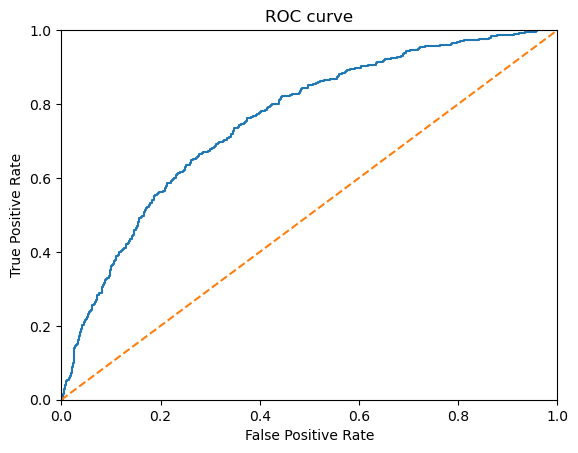

In [12]:
# Perform downsampling of the majority class (negative observations) to balance the dataset
lr_features_downsampled, lr_target_downsampled = downsample(
    features_train_ohe,  # Features of the original training set
    target_train_ohe,    # Target variable of the original training set
    0.1                  # Desired ratio of positive to negative observations after downsampling
)

# Initialize Logistic Regression model with balanced class weights
lr_downsample_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

# Train the Logistic Regression model on the downsampled data
lr_downsample_model.fit(lr_features_downsampled, lr_target_downsampled)

# Make predictions on the validation set using the trained model
lr_downsample_predicted_valid = lr_downsample_model.predict(features_valid_ohe)

# Print model evaluation metrics with downsampling and class weight adjustment
print("Logistic Regression Model Metrics w/ Weight Adjustment and DOWNSAMPLING:")
print()
lr_downsample_accuracy, lr_downsample_recall, lr_downsample_precision, lr_downsample_f1 = metric(target_valid_ohe, lr_downsample_predicted_valid)
print_metrics(lr_downsample_accuracy, lr_downsample_recall, lr_downsample_precision, lr_downsample_f1)

# Calculate and plot ROC AUC curve for the Logistic Regression model
auc_roc(lr_downsample_model, features_valid_ohe, target_valid_ohe)

### Logistc Regression Model (Upsampling & Class-Weight Adjustment)

Logistic Regression Model Metrics w/ Weight Adjustment and UPSAMPLING:

Accuracy Score: 0.702
Recall Score: 0.6818181818181818
Precision Score: 0.3810160427807487
F1 Score: 0.4888507718696398
AUC-ROC: 0.7636115630992202


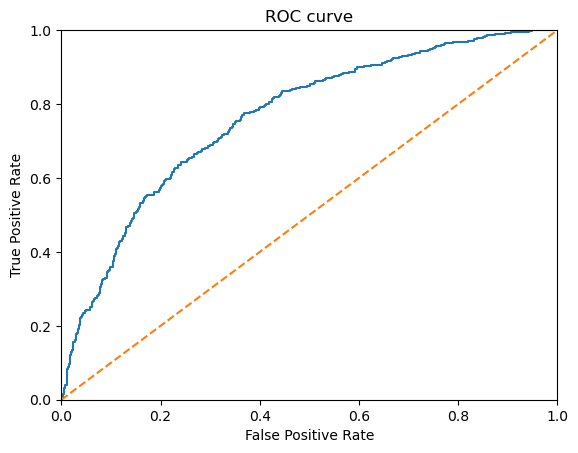

In [13]:
# Perform upsampling of the minority class (positive observations) to balance the dataset
lr_features_upsampled, lr_target_upsampled = upsample(
    features_train_ohe, target_train_ohe, 10
)

# Initialize Logistic Regression model with balanced class weights
lr_upsample_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')

# Train the Logistic Regression model on the upsampled data
lr_upsample_model.fit(lr_features_upsampled, lr_target_upsampled)

# Make predictions on the validation set using the trained model
lr_upsample_predicted_valid = lr_upsample_model.predict(features_valid_ohe)

# Print model evaluation metrics with upsampling and class weight adjustment
print("Logistic Regression Model Metrics w/ Weight Adjustment and UPSAMPLING:")
print()
lr_upsample_accuracy, lr_upsample_recall, lr_upsample_precision, lr_upsample_f1 = metric(target_valid_ohe, lr_upsample_predicted_valid)
print_metrics(lr_upsample_accuracy, lr_upsample_recall, lr_upsample_precision, lr_upsample_f1)

# Calculate and plot ROC AUC curve for the Logistic Regression model
auc_roc(lr_upsample_model, features_valid_ohe, target_valid_ohe)

### Decision Tree Model (Downsampling & Class Weight Adjustment)

Best depth of Decision Tree model with DOWNSAMPLING (accoring to F1 score): max_depth=4

Accuracy Score: 0.751
Recall Score: 0.7200956937799043
Precision Score: 0.4413489736070381
F1 Score: 0.5472727272727272
AUC-ROC: 0.6604473774944198


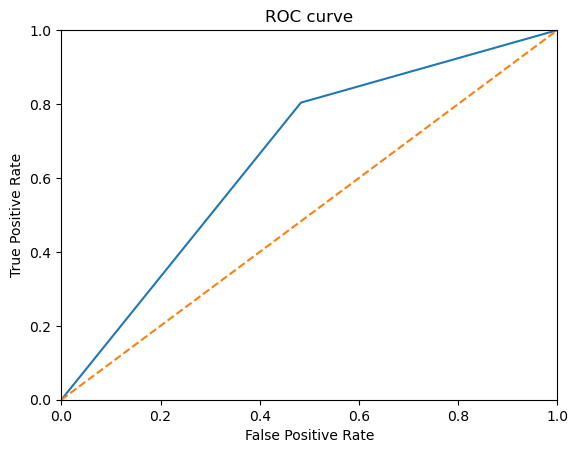

In [14]:
# Perform downsampling of the majority class (negative observations) to balance the dataset
tree_features_downsampled, tree_target_downsampled = downsample(
    features_train_ordinal, target_train_ordinal, 0.1
)

# Perform Decision Tree validation on downsampled data
(dt_downsample_best_accuracy, 
 dt_downsample_best_recall, 
 dt_downsample_best_precision, 
 dt_downsample_best_f1, 
 dt_downsample_best_depth,
 dt_downsample_model) = decision_tree_validation(tree_features_downsampled, tree_target_downsampled, features_valid_ordinal, target_valid_ordinal)

# Print the best depth of Decision Tree model based on F1 score
print("Best depth of Decision Tree model with DOWNSAMPLING (accoring to F1 score): max_depth={}".format(dt_downsample_best_depth))
print()

# Print metrics (accuracy, recall, precision, F1) of the Decision Tree model with downsampling
print_metrics(dt_downsample_best_accuracy, dt_downsample_best_recall, dt_downsample_best_precision, dt_downsample_best_f1)

# Plot AUC-ROC curve for the Decision Tree model with downsampling
auc_roc(dt_downsample_model, features_valid_ordinal, target_valid_ordinal)

### Decision Tree Model (Upsampling & Class Weight Adjustment)

Best depth of Decision Tree model with UPSAMPLING (accoring to F1 score): max_depth=5

Accuracy Score: 0.8085
Recall Score: 0.6578947368421053
Precision Score: 0.5339805825242718
F1 Score: 0.5894962486602359
AUC-ROC: 0.6723501230953489


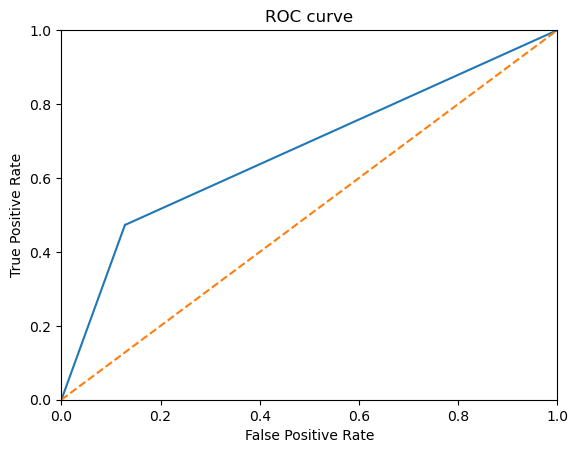

In [15]:
# Perform upsampling of the majority class (negative observations) to balance the dataset
tree_features_upsampled, tree_target_upsampled = upsample(
    features_train_ordinal, target_train_ordinal, 10
)

# Perform Decision Tree validation on upsampled data
(dt_upsample_best_accuracy, 
 dt_upsample_best_recall, 
 dt_upsample_best_precision, 
 dt_upsample_best_f1, 
 dt_upsample_best_depth,
 dt_upsample_model) = decision_tree_validation(tree_features_upsampled, tree_target_upsampled, features_valid_ordinal, target_valid_ordinal)

# Print the best depth of Decision Tree model based on F1 score
print("Best depth of Decision Tree model with UPSAMPLING (accoring to F1 score): max_depth={}".format(dt_upsample_best_depth))
print()

# Print metrics (accuracy, recall, precision, F1) of the Decision Tree model with upsampling
print_metrics(dt_upsample_best_accuracy, dt_upsample_best_recall, dt_upsample_best_precision, dt_upsample_best_f1)

# Plot AUC-ROC curve for the Decision Tree model with upsampling
auc_roc(dt_upsample_model, features_valid_ordinal, target_valid_ordinal)

### Random Forest Model (Downsampling & Class Weight Adjustment)

Best depth and number of estimators of Random Forest model with DOWNSAMPLING (accoring to F1 score): max_depth=3 & n_estimators=6

Accuracy Score: 0.774
Recall Score: 0.7296650717703349
Precision Score: 0.47360248447204967
F1 Score: 0.5743879472693032
AUC-ROC: 0.8337282768465815


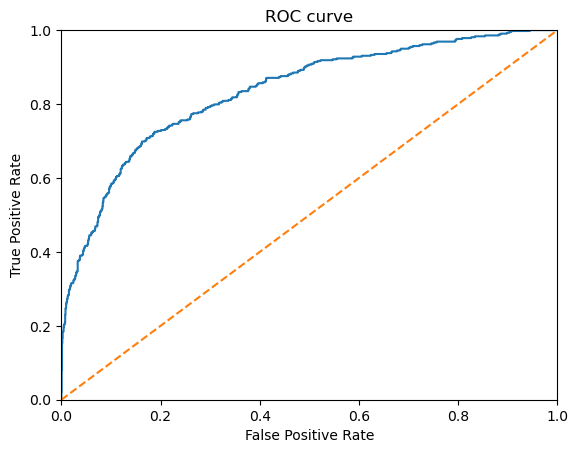

In [16]:
# Perform Random Forest validation on downsampled data
(rf_downsample_best_accuracy, 
 rf_downsample_best_recall, 
 rf_downsample_best_precision, 
 rf_downsample_best_f1, 
 rf_downsample_best_depth, 
 rf_downsample_best_est,
 rf_downsample_model) = random_forest_validation(tree_features_downsampled, tree_target_downsampled, features_valid_ordinal, target_valid_ordinal)

# Print the best depth and number of estimatores of Random Forest model based on F1 score
print("Best depth and number of estimators of Random Forest model with DOWNSAMPLING (accoring to F1 score): max_depth={} & n_estimators={}".format(rf_downsample_best_depth, rf_downsample_best_est))
print()

# Print metrics (accuracy, recall, precision, F1) of the Random Forest model with downsampling
print_metrics(rf_downsample_best_accuracy, rf_downsample_best_recall, rf_downsample_best_precision, rf_downsample_best_f1)

# Plot AUC-ROC curve for the Random Forest model with downsampling
auc_roc(rf_downsample_model, features_valid_ordinal, target_valid_ordinal)

### Random Forest Model (Upsampling & Class Weight Adjustment)

Best depth and number of estimators of Random Forest model with UPSAMPLING (accoring to F1 score): max_depth=5 & n_estimators=39

Accuracy Score: 0.8045
Recall Score: 0.7248803827751196
Precision Score: 0.5233160621761658
F1 Score: 0.6078234704112337
AUC-ROC: 0.8475076972398816


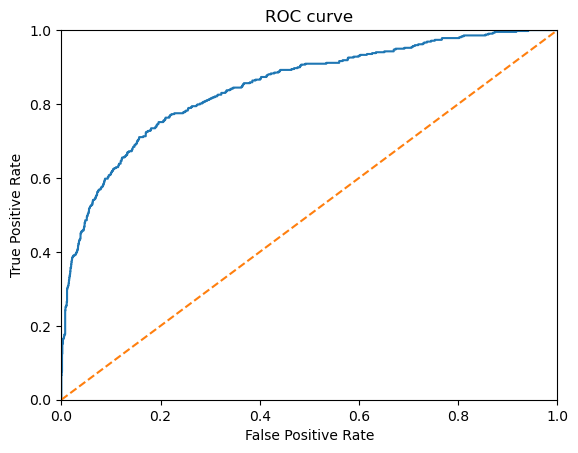

In [17]:
# Perform Random Forest validation on upsampled data
(rf_upsample_best_accuracy, 
 rf_upsample_best_recall, 
 rf_upsample_best_precision, 
 rf_upsample_best_f1, 
 rf_upsample_best_depth, 
 rf_upsample_best_est,
 rf_upsample_model) = random_forest_validation(tree_features_upsampled, tree_target_upsampled, features_valid_ordinal, target_valid_ordinal)

# Print the best depth and number of estimatores of Random Forest model based on F1 score
print("Best depth and number of estimators of Random Forest model with UPSAMPLING (accoring to F1 score): max_depth={} & n_estimators={}".format(rf_upsample_best_depth, rf_upsample_best_est))
print()

# Print metrics (accuracy, recall, precision, F1) of the Random Forest model with upsampling
print_metrics(rf_upsample_best_accuracy, rf_upsample_best_recall, rf_upsample_best_precision, rf_upsample_best_f1)

# Plot AUC-ROC curve for the Random Forest model with upsampling
auc_roc(rf_upsample_model, features_valid_ordinal, target_valid_ordinal)

Input analysis of the models performances with balanced classes and decide which one to use for testing.

## Final Test

Final Random Forest Model Metrics w/ Weight Adjustment and UPSAMPLING:

Accuracy Score: 0.7935
Recall Score: 0.706855791962175
Precision Score: 0.5085034013605442
F1 Score: 0.5914935707220574
AUC-ROC: 0.8454587292806912


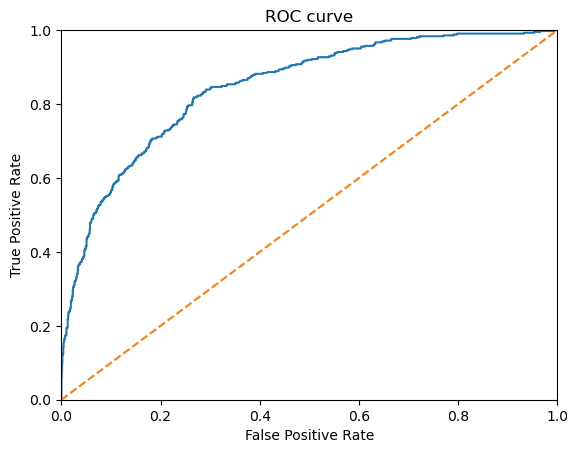

In [18]:
final_model = RandomForestClassifier(random_state=12345, class_weight='balanced', max_depth=5, n_estimators=39)
final_model.fit(tree_features_upsampled, tree_target_upsampled)
predicted_test = final_model.predict(features_test_ordinal)

print("Final Random Forest Model Metrics w/ Weight Adjustment and UPSAMPLING:")
print()

final_accuracy, final_recall, final_precision, final_f1 = metric(target_test_ordinal, predicted_test)
print_metrics(final_accuracy, final_recall, final_precision, final_f1)

auc_roc(final_model, features_test_ordinal, target_test_ordinal)

## Conclusion